In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('D2z.txt', sep=" ", header=None)
data.head(10)

,0,1,2
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0
5,-1.364140,0.623197,1
6,0.596974,0.047185,1
7,-1.620280,-0.214322,1
8,-1.275200,0.409967,1
9,-0.244046,1.040070,1


In [4]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


## defining a global variable

In [5]:
def euclidean_distance(X1,X2):
    distances=np.sqrt(np.sum((X1-X2)**2))
    return  distances

In [6]:
class KNN():
    def __init__(self,k):
        self.k=k

    def fit(self,X,Y):
        self.X_train=X
        self.Y_train=Y

    def predict(self,X): # this function makes prediction for all the test data points
     predictions=[self.pred(x) for x in X]
     return predictions
    
    def pred(self,x): #helper function for making prediction for a single testing data
        distances=[euclidean_distance(x_train,x) for x_train in self.X_train]
        #get the closest K
        k_indices=np.argsort(distances)[:self.k] #first sorting the distances in ascending order then taking the first k values from the k_indices vector
        k_nearest_labels=[self.Y_train[i] for i in k_indices] #gives the values of target labels corresponding to those k_indices, e.g-red,red,blue,for k=3
        #majority vote
        majority_vote=Counter(k_nearest_labels).most_common() #e.g red for previous line example
        return majority_vote[0][0]
    
    


## fitting the model

In [7]:
clf=KNN(k=1)
clf.fit(X_train,Y_train) # calling the fit function from KNN class
predictions=clf.predict(X_test) # calling the predict function from KNN class
#predictions=np.array(predictions)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


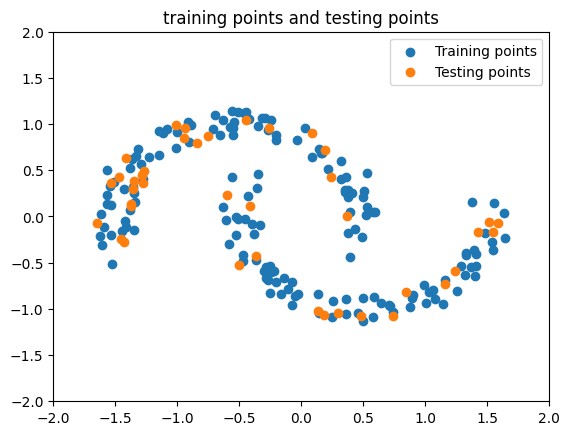

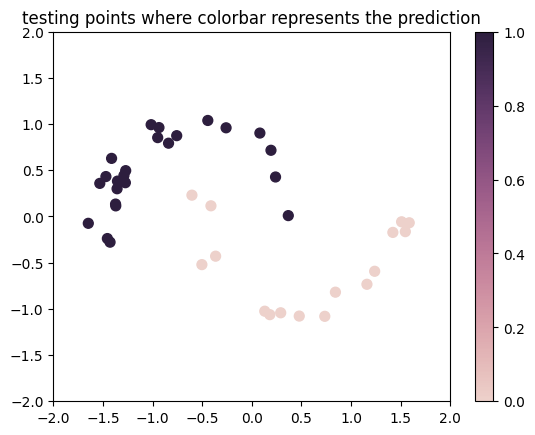

In [11]:
plt.figure()
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(X_test[:,0],X_test[:,1])
plt.legend(["Training points", "Testing points"], loc ="upper right") 
plt.title('training points and testing points')
plt.savefig("sec2_Q1_first_plot.eps")
#plt.scatter(X_test[:,0],X_test[:,1],c=predictions)
#plt.scatter(predictions[:,0],predictions[:,1])
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
plt.xlim(-2,2)
plt.ylim(-2,2)
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions, s=50, cmap=cmap)

f.colorbar(points)
plt.title('testing points where colorbar represents the prediction')
plt.savefig("sec2_Q1_second_plot.eps")
plt.show()

In [9]:
predictions

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1]